<a href="https://colab.research.google.com/github/NehaKoulecar/Handwritten_Digit_Recognition/blob/master/HandwrittenDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwritten Digit Recognition - convolutional neural network

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import math
import datetime
import platform


In [3]:
# Loading tensorboard extension
%load_ext tensorboard

**Loading training and testing data**

The training data includes 60000 images of handwritten digits of 28x28 pixels.

The testing dataset include 10000 images.

In [5]:
# Loading MNIST dataset using Keras library
mnist_data = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

In [6]:
# Verifying the data
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [7]:
# Saving image parameters
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_HEIGHT: 28
IMAGE_WIDTH: 28
IMAGE_CHANNELS: 1


**Exploring data**

Data is an integer matrix

In [8]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


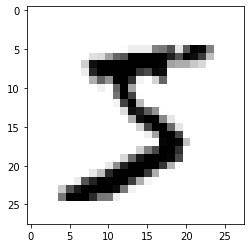

In [9]:
# Visualizing the first image in the matrix
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

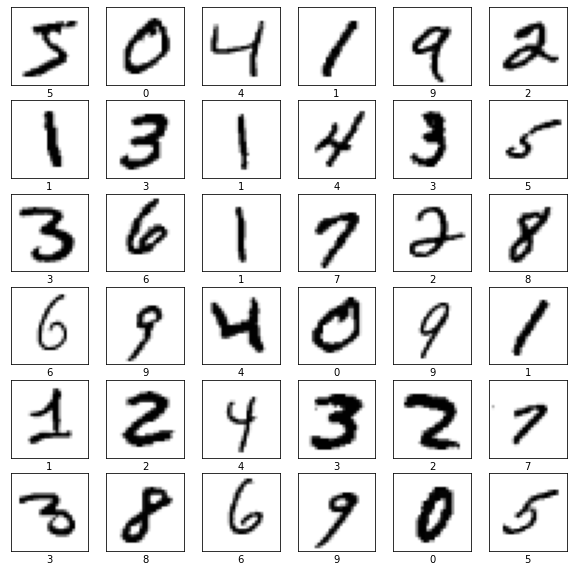

In [10]:
# Displaying first 36 images 
num_display = 36
no_cells = math.ceil(math.sqrt(num_display))
plt.figure(figsize=(10,10))
for i in range(num_display):
    plt.subplot(no_cells, no_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**Data Pre-processing**
We need to restructure our data and add a colour channel in order to employ convolution layers. As you may have seen, each digit currently has the shape of (28, 28), which denotes that it is a 28x28 matrix of colour values ranging from 0 to 255. In order for each pixel to potentially have many channels, we need to restructure it to the shape (28, 28, 1). (like Red, Green and Blue).

In [11]:
x_train_channels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_channels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [12]:
print('x_train_channels:', x_train_channels.shape)
print('x_test_channels:', x_test_channels.shape)

x_train_channels: (60000, 28, 28, 1)
x_test_channels: (10000, 28, 28, 1)


**Normalizing data**

Converting value range from [0...255] to [0...1].

In [13]:
x_train_normalize = x_train_channels / 255
x_test_normalize = x_test_channels / 255

In [14]:
# Verifying one row post normalization.
x_train_normalize[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

Building the model

In [19]:
# Sequential Keras model with two pairs of Convolution2D and MaxPooling2D layers.

model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model1.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model1.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model1.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model1.add(tf.keras.layers.Dropout(0.2))

model1.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))


In [21]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

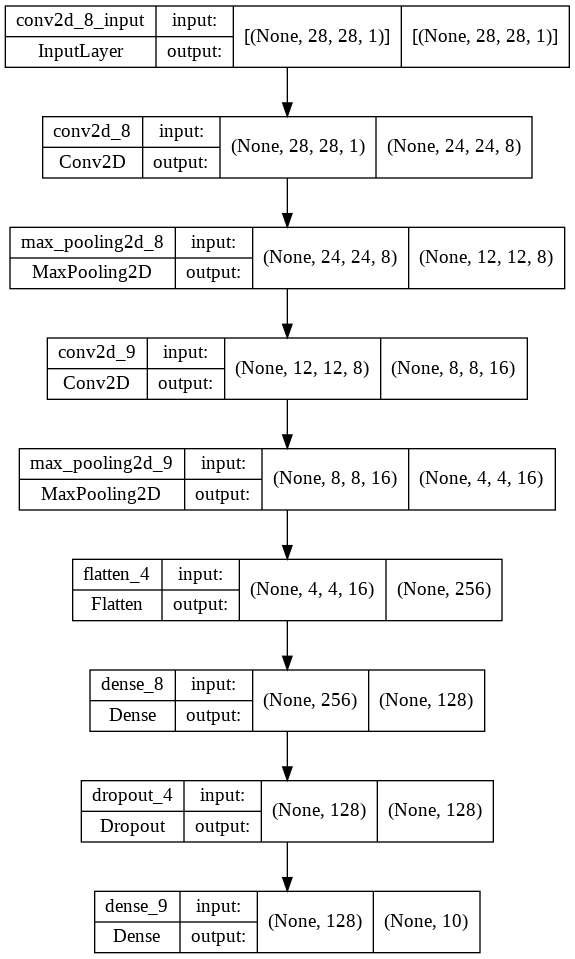

In [23]:
# Plotting the model
tf.keras.utils.plot_model(                     
    model1,
    show_shapes=True,
    show_layer_names=True,
)

Compiling the model

In [24]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Training the model

In [27]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_hist = model1.fit(
    x_train_normalize,
    y_train,
    epochs=10,
    validation_data=(x_test_normalize, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0306 - val_accuracy: 0.9921
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0418 - val_accuracy: 0.9900
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0393 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0326 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0116 - accuracy: 0.9960 - val_loss: 0.0367 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0345 - val_accuracy: 0.9925
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0404 -

Examining how the loss function changed over the course of the training. On each next epoch, we anticipate it to get smaller and smaller.



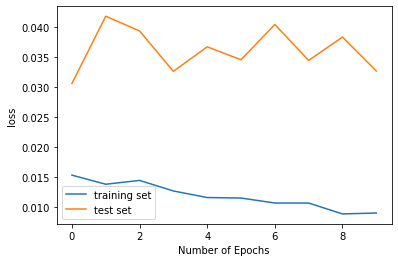

In [29]:
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.plot(training_hist.history['loss'], label='training set')
plt.plot(training_hist.history['val_loss'], label='test set')
plt.legend()

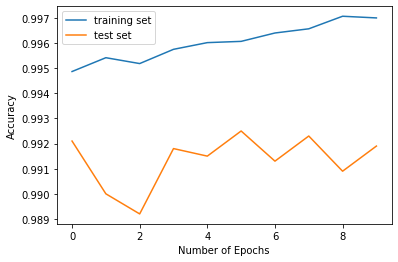

In [30]:
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.plot(training_hist.history['accuracy'], label='training set')
plt.plot(training_hist.history['val_accuracy'], label='test set')
plt.legend()

**Evaluating the model accuracy**

Comparing the accuracy of the model on training dataset and testing dataset.

In [37]:

train_loss, train_acc = model1.evaluate(x_train_normalize, y_train)

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0016 - accuracy: 0.9995


In [38]:
# Printing train loss and train accuracy
print('Train Loss: ', train_loss)
print('Train Accuracy: ', train_acc)

Train Loss:  0.001625395962037146
Train Accuracy:  0.9995166659355164


In [40]:
val_loss, val_acc = model1.evaluate(x_test_normalize, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0327 - accuracy: 0.9919


In [42]:
print('Validation Loss: ', val_loss)
print('Validation Accuracy: ', val_acc)

Validation Loss:  0.0326727069914341
Validation Accuracy:  0.9919000267982483


Saving the model

In [47]:
model1_name = 'cnn_digit_recognition.h5'
model1.save(model1_name, save_format='h5')

In [49]:
loaded_model1 = tf.keras.models.load_model(model1_name)

In [52]:
#Predicting the digits
predictions1_one_hot = loaded_model1.predict([x_test_normalize])   


In [53]:
print('predictions_one_hot:', predictions1_one_hot.shape)

predictions_one_hot: (10000, 10)


There are ten probability for each forecast (one for each number from 0 to 9). Since our model will be most confident with the digit with the highest probability, we must choose that digit.

In [56]:
pd.DataFrame(predictions1_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.612570e-16,1.455311e-11,9.648328e-15,1.967094e-12,1.914391e-13,1.018192e-14,1.287282e-23,1.000000e+00,1.882459e-13,7.053356e-13
1,3.011397e-18,7.525520e-21,1.000000e+00,5.947527e-20,4.363058e-26,1.963245e-30,2.703352e-21,1.036746e-22,4.819645e-23,1.635269e-28
2,5.522559e-11,1.000000e+00,9.624982e-12,3.943782e-20,3.709595e-11,8.371162e-10,4.736672e-10,1.062711e-11,9.246672e-12,1.676474e-16
3,1.000000e+00,2.951397e-16,1.294564e-17,2.627018e-18,4.513870e-18,5.993732e-15,1.796961e-09,6.029362e-17,8.016309e-15,1.245817e-14
4,2.490781e-15,9.936268e-14,3.041925e-15,5.974926e-19,9.999989e-01,2.233663e-12,2.443495e-12,3.318383e-14,7.203098e-11,1.097937e-06
...,...,...,...,...,...,...,...,...,...,...
9995,1.302890e-20,7.135743e-19,1.000000e+00,3.915014e-22,9.603036e-26,3.285743e-33,1.158807e-25,1.404534e-16,1.626441e-20,9.506761e-29
9996,6.968296e-25,2.678916e-16,3.920474e-19,1.000000e+00,2.284445e-21,9.561945e-12,3.723923e-22,6.143355e-18,3.764925e-18,6.683096e-16
9997,3.538295e-38,1.229111e-23,1.169130e-26,2.501166e-35,1.000000e+00,3.318290e-26,3.685404e-27,1.121004e-27,2.149490e-25,2.361364e-19
9998,3.111040e-21,1.840651e-22,9.021493e-26,1.959237e-13,7.483345e-23,1.000000e+00,1.681246e-15,8.118643e-28,1.698324e-08,1.200028e-17


In [58]:
# Extracting prediction with highest probability
predictions1 = np.argmax(predictions1_one_hot, axis=1)
pd.DataFrame(predictions1)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [59]:
print(predictions1[4])

4


Let's print the fourth image from a test set to see if model's prediction is correct.

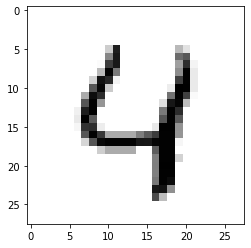

In [60]:
plt.imshow(x_test_normalize[4].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

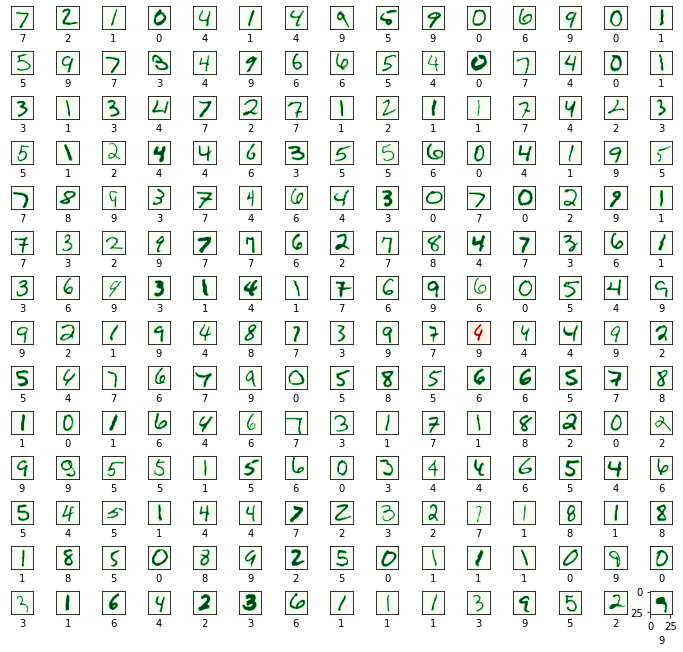

In [66]:
num_display = 210
no_cells = math.ceil(math.sqrt(num_display))
plt.figure(figsize=(12, 12))

for plot_index in range(num_display):    
    predicted_label = predictions1[plot_index]
    plt.yticks([])
    plt.xticks([])
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.grid(False)
    plt.subplot(no_cells, no_cells, plot_index + 1)
    plt.imshow(x_test_normalize[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Confusion matrix plot

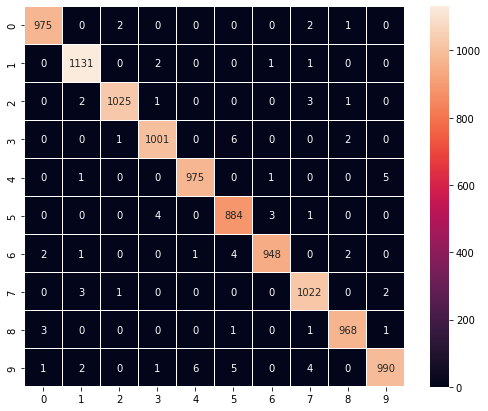

In [67]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions1)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    linewidths=.5,
    annot=True,
    square=True,
    fmt="d",
    ax=ax
)
plt.show()